<a href="https://colab.research.google.com/github/Samin765/DD2430_Project/blob/main/CLIP_prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Constants

In [ ]:
# Are you developing locally or on google colab?
COLAB = True

# False if you have already downloaded once
SHOULD_DOWNLOAD_DATA = False

# False if you have already created and saved a .pth file to PTH_SAVE_PATH
CREATE_NEW_DATASET = True

# train, test, val set size. Should sum to 1
SET_SIZES = {
    "train": 0.8,
    "test": 0.1,
    "val": 0.1,
}

# samples per class in uniform dataset
N_SAMPLES = 250

## Do not change these
This colab will download everything to these path, no need to change them.

In [ ]:
# path to dataset (do not change)
HM_DATA_PATH = "/content/drive/MyDrive/dd2430_clip_project/dataset/" if COLAB else "./data/"

# path to pth saves (do not change)
PTH_SAVE_PATH = "/content/drive/MyDrive/dd2430_clip_project/pth/" if COLAB else "./pth/"

# Imports

In [ ]:
import os
import random
import numpy as np
from tqdm import tqdm
import importlib
import gdown
import numpy as np
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import transformers
from google.colab import files, drive
import gdown

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = 'cpu'

if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available(): # For apple silicon
    device = 'mps'

print("Using device:", device)

Using device: cuda


# Download github files

In [ ]:
if COLAB:
    os.makedirs("/content/drive/MyDrive/dd2430_clip_project/pth", exist_ok=True)

    %cd /content/drive/MyDrive/dd2430_clip_project/

    !git clone https://@github.com/Samin765/DD2430_Project.git
    %mv DD2430_Project/* .
    %rm -rf DD2430_Project

/content/drive/MyDrive/dd2430_clip_project
Cloning into 'DD2430_Project'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 134 (delta 66), reused 51 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (134/134), 4.21 MiB | 6.05 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [ ]:
# The dataset contains > 105k images. Google Drive is really bad when
# it comes to uploading many files, so this will take like 20 min.

if SHOULD_DOWNLOAD_DATA and not os.path.exists(HM_DATA_PATH):
    %cd /content/drive/MyDrive/dd2430_clip_project/
    gdown.download("https://drive.google.com/uc?id=1EZ3AfRp-RMj70qZzIAC-BR0sHsrfjOWx") # dataset
    !unzip -q dataset.zip

#Dataset

## Create new dataset
This will create a new dataset and save it as a .pth to google drive. If you getan error, then it is most likely becuase you can not make a daatset that large.

In [ ]:
import datasets
importlib.reload(datasets)

if CREATE_NEW_DATASET:
    dataset = datasets.HMDataset2(
        articles_csv = HM_DATA_PATH + 'articles.csv',
        image_dir = HM_DATA_PATH + 'images',
        main_class = 'garment_group_name',
        model = transformers.CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device),
        processor = transformers.CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
    )
    # data per class
    n_samples =  N_SAMPLES

    assert dataset.articles[dataset.main_class].value_counts().min()>n_samples, 'Can not make balanced set'

    # you can also set all to n_samples then set the ones you want to 0
    for exclude_subclass in ['Unknown', 'Special Offers', 'some other']:
        dataset.counts[exclude_subclass]=n_samples

    # Create uniform dataset
    image_emb, labels, images = dataset.get_n_of_each(n_samples)

    data_to_save = {
        'image_embedding': image_emb,
        'class_text': labels,
        'images': images,
    }
    os.makedirs(PTH_SAVE_PATH, exist_ok=True)
    torch.save(data_to_save, f'{PTH_SAVE_PATH}HM_data_{n_samples}.pth')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Max uniform size: 908


/usr/local/lib/python3.10/dist-packages/transformers/models/clip/processing_clip.py:149: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


Image for article 179208001 not found. Takes next
Image for article 212629004 not found. Takes next
Image for article 215324023 not found. Takes next
Image for article 216961011 not found. Takes next
Image for article 272591001 not found. Takes next
Image for article 348657006 not found. Takes next
Image for article 369423002 not found. Takes next
Image for article 388916001 not found. Takes next
Image for article 397376010 not found. Takes next
Image for article 398947001 not found. Takes next
Image for article 408875001 not found. Takes next
Image for article 420264002 not found. Takes next
Image for article 425683012 not found. Takes next
Image for article 442786001 not found. Takes next
Image for article 468666002 not found. Takes next
Image for article 475827007 not found. Takes next
Image for article 480076004 not found. Takes next
Image for article 481777003 not found. Takes next
Image for article 481797022 not found. Takes next
Image for article 484864002 not found. Takes next


## Load dataset
If you already have the HM data and .pth saved in google drive, this is where the actual code/program begins.

Remember to change the constants at the top so you don't download and/or create a new dataset next time.

In [ ]:
def load_from_private_drive():
    """If you have it locally"""
    #drive.mount('/content/drive')
    n_samples = N_SAMPLES
    file_to_load = f"HM_data_{n_samples}.pth"

    loaded_data = torch.load(f'{PTH_SAVE_PATH}{file_to_load}')

    image_emb = loaded_data['image_embedding']
    labels = loaded_data['class_text']
    images = loaded_data['images']

    #dataset = UniformHMDataset(image_emb, labels , images)
    return image_emb, images, labels

def load_from_project_drive(link):
    """Shared file in drive and insert link id"""
    import gdown
    output = 'Dataset_loaded.pth'
    gdown.download(f"https://drive.google.com/uc?id={link}", output, quiet=False)
    loaded_data = torch.load(output, map_location=device)
    image_emb = loaded_data['image_embedding']
    labels = loaded_data['class_text']
    images = loaded_data['images'] # good to have to see sclaling and transform..
    #dataset = UniformHMDataset(image_emb, labels , images)
    return image_emb, images, labels


project_drive = False # if you want to load from my drive, NEW SET
if project_drive:# DO NOT USE TOO OFTEN OR 24h waiting period
  data = load_from_project_drive(link='16we5aQ_Mbk1791_8WT522HmR0lwlwwqQ')
else:
  data = load_from_private_drive()
image_emb0, images0, labels0 = data

<ipython-input-10-68adeae7d149>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_data = torch.load(f'{PTH_SAVE_PATH}{file_to_load}')


# Evaluate

**Finetuning**

Performance decreases if we add untuned soft prompts, now we finetune

In [ ]:
# functions for clip text and image embeddings, forward pass etc
# remember to import this again if you change something
# And varius function that doesn't fit into model_functions or datasets
# for example displaying images
import model_functions, utils, training, datasets
importlib.reload(utils) # issues with colab not updating
importlib.reload(training)
importlib.reload(model_functions)
importlib.reload(datasets)
import model_functions, utils, training

**Split datasets**

In [ ]:
dataset, dataset_train, dataset_test, dataset_val = datasets.split(labels0, image_emb0, images0, N_SAMPLES, SET_SIZES)
batch_size = 128
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

4750 3800 475 475
Counter({'Accessories': 250, 'Blouses': 250, 'Dressed': 250, 'Dresses Ladies': 250, 'Dresses/Skirts girls': 250, 'Jersey Basic': 250, 'Jersey Fancy': 250, 'Knitwear': 250, 'Outdoor': 250, 'Shirts': 250, 'Shoes': 250, 'Shorts': 250, 'Skirts': 250, 'Socks and Tights': 250, 'Swimwear': 250, 'Trousers': 250, 'Trousers Denim': 250, 'Under-, Nightwear': 250, 'Woven/Jersey/Knitted mix Baby': 250})
Counter({'Under-, Nightwear': 200, 'Outdoor': 200, 'Dresses/Skirts girls': 200, 'Shirts': 200, 'Trousers': 200, 'Dresses Ladies': 200, 'Blouses': 200, 'Knitwear': 200, 'Jersey Fancy': 200, 'Shoes': 200, 'Skirts': 200, 'Swimwear': 200, 'Dressed': 200, 'Shorts': 200, 'Socks and Tights': 200, 'Woven/Jersey/Knitted mix Baby': 200, 'Trousers Denim': 200, 'Accessories': 200, 'Jersey Basic': 200})
Counter({'Dresses Ladies': 25, 'Socks and Tights': 25, 'Jersey Fancy': 25, 'Jersey Basic': 25, 'Knitwear': 25, 'Shoes': 25, 'Blouses': 25, 'Trousers': 25, 'Woven/Jersey/Knitted mix Baby': 25, 'D

In [ ]:
model = transformers.CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = transformers.CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
processor.feature_extractor.do_rescale = False # make sure image values: False=> [0-1] and True=> [0,255]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/processing_clip.py:149: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


##**Baseline**

The performance of the untuned CLIP

100%|██████████| 4/4 [00:00<00:00,  5.99it/s]


Accuracyasdasdas 35.3684196472168


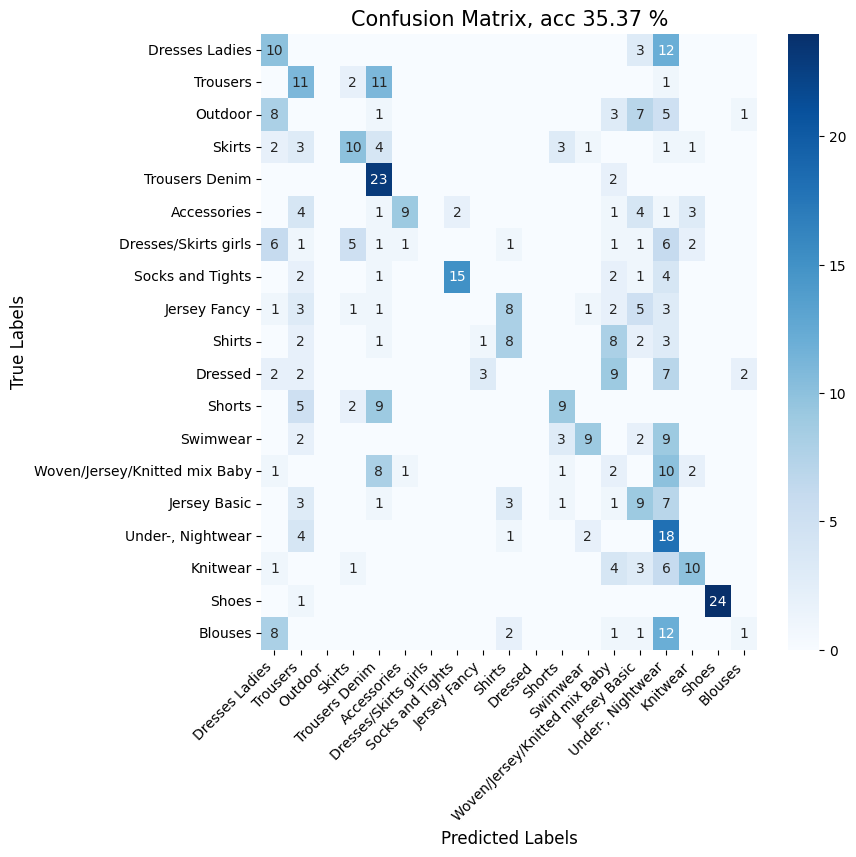

Accuracy of baseline is 35.37 %


In [ ]:
dataloaders = {'train':dataloader_train, 'val':dataloader_val, 'test':dataloader_test}
clip = {'m':model, 'p':processor}

ft = training.FinetuneCLIP(dataloaders, clip)
ft.tt['soft'], ft.tt['LoRA'] = 0, 0 #baseline

ft.initialize({'add':''})  # do not add anything
all_predictions, all_labels, acc = ft.eval(False)
utils.confussion_matrix(all_labels, all_predictions, list(dataset_test.class_to_id.keys()),F1=False)
print(f"Accuracy of baseline is {acc:.2f} %")

Predicts many as Under-nightwear

##**Hard prompt tuning**

Easiest way to finetune, just change the text accompanied by labels

In [ ]:
dataloaders = {'train':dataloader_train, 'val':dataloader_val, 'test':dataloader_test}
clip = {'m':model, 'p':processor}

texts = ['', 'An image of', 'The cloathing type is', 'An image showing cloathing of type']
perf = []
for added_text in texts:
    ft = training.FinetuneCLIP(dataloaders, clip)
    ft.tt['soft'], ft.tt['LoRA'] = 0, 0 #baseline
    ft.train_p['add'] = added_text
    _, _, acc = ft.eval(False)
    perf.append(np.round(acc,2))
print(perf)
print(f"Best accuracy of hard-prompt tune is {max(perf):.2f} %")

100%|██████████| 4/4 [00:00<00:00, 30.27it/s]


Accuracyasdasdas 35.3684196472168


100%|██████████| 4/4 [00:00<00:00, 31.94it/s]


Accuracyasdasdas 38.94736862182617


100%|██████████| 4/4 [00:00<00:00, 26.83it/s]


Accuracyasdasdas 31.578947067260742


100%|██████████| 4/4 [00:00<00:00, 33.39it/s]

Accuracyasdasdas 34.105262756347656
[35.37, 38.95, 31.58, 34.11]
Best accuracy of hard-prompt tune is 38.95 %


##**Soft prompt**

Add a tunable tensor in the embedding of the text. Added hyperparam search

In [ ]:
dataloaders = {'train':dataloader_train, 'val':dataloader_val, 'test':dataloader_test}
clip = {'m':model, 'p':processor}
hp ={'hyperp':[1,2,3,4,5,6] , 'best_losses':[], 'params':[]}
for num_soft in hp['hyperp']:
  ft = training.FinetuneCLIP(dataloaders, clip)
  ft.initialize({'num_soft':num_soft, 'add':''})
  ft.tt['soft'], ft.tt['LoRA'] = 1, 0 #soft
  _, train_p = ft.train()
  hp['params'].append(train_p['soft']) # TODO load best of these later to evaluate on test set, I did not, i ran it again for [5].
  hp['best_losses'].append(ft.loss['val'][-ft.es['pat']])

  4%|▍         | 8/200 [00:32<12:34,  3.93s/it]

Patience is 2 / 10


  4%|▍         | 9/200 [00:35<12:21,  3.88s/it]

Patience is 3 / 10


  5%|▌         | 10/200 [00:39<12:13,  3.86s/it]

Patience is 4 / 10


  6%|▌         | 11/200 [00:43<12:08,  3.86s/it]

Patience is 5 / 10


  6%|▌         | 12/200 [00:47<12:03,  3.85s/it]

Patience is 6 / 10


  8%|▊         | 17/200 [01:08<12:44,  4.18s/it]

Patience is 2 / 10


  9%|▉         | 18/200 [01:12<12:15,  4.04s/it]

Patience is 3 / 10


 10%|█         | 21/200 [01:23<11:31,  3.86s/it]

Patience is 2 / 10


 13%|█▎        | 26/200 [01:42<11:01,  3.80s/it]

Patience is 2 / 10


 16%|█▌        | 31/200 [02:01<10:44,  3.81s/it]

Patience is 2 / 10


 19%|█▉        | 38/200 [02:27<10:13,  3.79s/it]

Patience is 2 / 10


 20%|█▉        | 39/200 [02:31<10:07,  3.77s/it]

Patience is 3 / 10


 20%|██        | 40/200 [02:35<10:00,  3.75s/it]

Patience is 4 / 10


 20%|██        | 41/200 [02:40<10:48,  4.08s/it]

Patience is 5 / 10


 21%|██        | 42/200 [02:44<10:57,  4.16s/it]

Patience is 6 / 10


 28%|██▊       | 57/200 [03:41<09:11,  3.86s/it]

Patience is 2 / 10


 29%|██▉       | 58/200 [03:45<09:02,  3.82s/it]

Patience is 3 / 10


 30%|██▉       | 59/200 [03:49<08:54,  3.79s/it]

Patience is 4 / 10


 30%|███       | 60/200 [03:52<08:51,  3.80s/it]

Patience is 5 / 10


 30%|███       | 61/200 [03:56<08:48,  3.80s/it]

Patience is 6 / 10


 33%|███▎      | 66/200 [04:15<08:33,  3.83s/it]

Patience is 2 / 10


 34%|███▎      | 67/200 [04:19<08:26,  3.81s/it]

Patience is 3 / 10


 34%|███▍      | 68/200 [04:23<08:25,  3.83s/it]

Patience is 4 / 10


 36%|███▋      | 73/200 [04:42<08:02,  3.80s/it]

Patience is 2 / 10


 39%|███▉      | 78/200 [05:01<07:41,  3.79s/it]

Patience is 2 / 10


 40%|████      | 81/200 [05:12<07:32,  3.80s/it]

Patience is 2 / 10


 41%|████      | 82/200 [05:16<07:34,  3.85s/it]

Patience is 3 / 10


 42%|████▏     | 83/200 [05:20<07:29,  3.84s/it]

Patience is 4 / 10


 44%|████▍     | 88/200 [05:39<07:04,  3.79s/it]

Patience is 2 / 10


 46%|████▌     | 91/200 [05:50<06:52,  3.78s/it]

Patience is 2 / 10


 46%|████▌     | 92/200 [05:54<06:46,  3.76s/it]

Patience is 3 / 10


 46%|████▋     | 93/200 [05:58<06:42,  3.76s/it]

Patience is 4 / 10


 47%|████▋     | 94/200 [06:02<06:40,  3.78s/it]

Patience is 5 / 10


 48%|████▊     | 95/200 [06:05<06:35,  3.76s/it]

Patience is 6 / 10


 48%|████▊     | 96/200 [06:09<06:30,  3.76s/it]

Patience is 7 / 10


 50%|████▉     | 99/200 [06:21<06:21,  3.78s/it]

Patience is 2 / 10


 50%|█████     | 100/200 [06:24<06:16,  3.76s/it]

Patience is 3 / 10


 50%|█████     | 101/200 [06:28<06:12,  3.77s/it]

Patience is 4 / 10


 51%|█████     | 102/200 [06:32<06:10,  3.78s/it]

Patience is 5 / 10


 52%|█████▏    | 103/200 [06:36<06:04,  3.76s/it]

Patience is 6 / 10


 52%|█████▏    | 104/200 [06:39<05:59,  3.75s/it]

Patience is 7 / 10


 52%|█████▎    | 105/200 [06:43<05:58,  3.77s/it]

Patience is 8 / 10


 53%|█████▎    | 106/200 [06:47<05:57,  3.80s/it]

Patience is 9 / 10


 53%|█████▎    | 106/200 [06:51<06:04,  3.88s/it]


Patience is 10 / 10


  2%|▏         | 4/200 [00:16<13:47,  4.22s/it]

Patience is 2 / 10


  4%|▍         | 9/200 [00:38<13:41,  4.30s/it]

Patience is 2 / 10


  8%|▊         | 16/200 [01:07<12:56,  4.22s/it]

Patience is 2 / 10


  8%|▊         | 17/200 [01:11<12:48,  4.20s/it]

Patience is 3 / 10


 10%|█         | 20/200 [01:24<12:53,  4.30s/it]

Patience is 2 / 10


 12%|█▏        | 23/200 [01:37<12:31,  4.25s/it]

Patience is 2 / 10


 12%|█▏        | 24/200 [01:41<12:22,  4.22s/it]

Patience is 3 / 10


 16%|█▋        | 33/200 [02:19<11:44,  4.22s/it]

Patience is 2 / 10


 17%|█▋        | 34/200 [02:23<11:36,  4.20s/it]

Patience is 3 / 10


 18%|█▊        | 35/200 [02:27<11:29,  4.18s/it]

Patience is 4 / 10


 18%|█▊        | 36/200 [02:32<11:30,  4.21s/it]

Patience is 5 / 10


 18%|█▊        | 37/200 [02:36<11:23,  4.20s/it]

Patience is 6 / 10


 21%|██        | 42/200 [02:57<11:02,  4.19s/it]

Patience is 2 / 10


 22%|██▏       | 43/200 [03:01<10:59,  4.20s/it]

Patience is 3 / 10


 22%|██▏       | 44/200 [03:05<10:51,  4.18s/it]

Patience is 4 / 10


 22%|██▎       | 45/200 [03:09<10:47,  4.18s/it]

Patience is 5 / 10


 24%|██▍       | 48/200 [03:22<10:35,  4.18s/it]

Patience is 2 / 10


 24%|██▍       | 49/200 [03:26<10:33,  4.20s/it]

Patience is 3 / 10


 25%|██▌       | 50/200 [03:30<10:29,  4.20s/it]

Patience is 4 / 10


 26%|██▌       | 51/200 [03:35<10:23,  4.18s/it]

Patience is 5 / 10


 26%|██▌       | 52/200 [03:39<10:20,  4.19s/it]

Patience is 6 / 10


 26%|██▋       | 53/200 [03:43<10:16,  4.20s/it]

Patience is 7 / 10


 27%|██▋       | 54/200 [03:47<10:09,  4.18s/it]

Patience is 8 / 10


 28%|██▊       | 55/200 [03:51<10:04,  4.17s/it]

Patience is 9 / 10


 28%|██▊       | 55/200 [03:56<10:22,  4.29s/it]


Patience is 10 / 10


  8%|▊         | 16/200 [01:11<13:42,  4.47s/it]

Patience is 2 / 10


  8%|▊         | 17/200 [01:15<13:35,  4.46s/it]

Patience is 3 / 10


 11%|█         | 22/200 [01:37<13:13,  4.46s/it]

Patience is 2 / 10


 12%|█▏        | 23/200 [01:42<13:09,  4.46s/it]

Patience is 3 / 10


 14%|█▍        | 28/200 [02:04<12:42,  4.43s/it]

Patience is 2 / 10


 18%|█▊        | 37/200 [02:44<12:07,  4.47s/it]

Patience is 2 / 10


 19%|█▉        | 38/200 [02:49<12:01,  4.46s/it]

Patience is 3 / 10


 22%|██▏       | 43/200 [03:11<11:42,  4.47s/it]

Patience is 2 / 10


 22%|██▏       | 44/200 [03:16<11:34,  4.45s/it]

Patience is 3 / 10


 22%|██▎       | 45/200 [03:20<11:30,  4.46s/it]

Patience is 4 / 10


 23%|██▎       | 46/200 [03:24<11:24,  4.44s/it]

Patience is 5 / 10


 24%|██▎       | 47/200 [03:29<11:17,  4.43s/it]

Patience is 6 / 10


 24%|██▍       | 48/200 [03:33<11:17,  4.46s/it]

Patience is 7 / 10


 26%|██▋       | 53/200 [03:56<10:52,  4.44s/it]

Patience is 2 / 10


 27%|██▋       | 54/200 [04:00<10:51,  4.46s/it]

Patience is 3 / 10


 28%|██▊       | 55/200 [04:05<10:47,  4.47s/it]

Patience is 4 / 10


 28%|██▊       | 56/200 [04:09<10:41,  4.45s/it]

Patience is 5 / 10


 28%|██▊       | 57/200 [04:13<10:38,  4.47s/it]

Patience is 6 / 10


 30%|███       | 60/200 [04:27<10:23,  4.46s/it]

Patience is 2 / 10


 30%|███       | 61/200 [04:31<10:23,  4.48s/it]

Patience is 3 / 10


 31%|███       | 62/200 [04:36<10:16,  4.47s/it]

Patience is 4 / 10


 36%|███▌      | 71/200 [05:16<09:34,  4.45s/it]

Patience is 2 / 10


 36%|███▌      | 72/200 [05:20<09:28,  4.44s/it]

Patience is 3 / 10


 36%|███▋      | 73/200 [05:25<09:26,  4.46s/it]

Patience is 4 / 10


 37%|███▋      | 74/200 [05:30<09:34,  4.56s/it]

Patience is 5 / 10


 38%|███▊      | 75/200 [05:34<09:26,  4.53s/it]

Patience is 6 / 10


 38%|███▊      | 76/200 [05:39<09:27,  4.58s/it]

Patience is 7 / 10


 38%|███▊      | 77/200 [05:44<09:36,  4.69s/it]

Patience is 8 / 10


 39%|███▉      | 78/200 [05:48<09:24,  4.63s/it]

Patience is 9 / 10


 40%|████      | 81/200 [06:02<09:11,  4.63s/it]

Patience is 2 / 10


 41%|████      | 82/200 [06:07<08:58,  4.56s/it]

Patience is 3 / 10


 42%|████▎     | 85/200 [06:20<08:34,  4.48s/it]

Patience is 2 / 10


 43%|████▎     | 86/200 [06:24<08:31,  4.49s/it]

Patience is 3 / 10


 46%|████▋     | 93/200 [06:56<08:01,  4.50s/it]

Patience is 2 / 10


 47%|████▋     | 94/200 [07:00<07:54,  4.48s/it]

Patience is 3 / 10


 48%|████▊     | 95/200 [07:05<07:49,  4.47s/it]

Patience is 4 / 10


 48%|████▊     | 96/200 [07:09<07:49,  4.52s/it]

Patience is 5 / 10


 48%|████▊     | 97/200 [07:14<07:41,  4.48s/it]

Patience is 6 / 10


 49%|████▉     | 98/200 [07:18<07:38,  4.49s/it]

Patience is 7 / 10


 50%|████▉     | 99/200 [07:23<07:36,  4.52s/it]

Patience is 8 / 10


 50%|█████     | 100/200 [07:27<07:28,  4.49s/it]

Patience is 9 / 10


 50%|█████     | 100/200 [07:32<07:32,  4.52s/it]


Patience is 10 / 10


  3%|▎         | 6/200 [00:29<15:47,  4.89s/it]

Patience is 2 / 10


  4%|▎         | 7/200 [00:34<15:43,  4.89s/it]

Patience is 3 / 10


  4%|▍         | 8/200 [00:39<15:32,  4.86s/it]

Patience is 4 / 10


  4%|▍         | 9/200 [00:43<15:22,  4.83s/it]

Patience is 5 / 10


  7%|▋         | 14/200 [01:08<15:01,  4.85s/it]

Patience is 2 / 10


 10%|▉         | 19/200 [01:32<14:40,  4.86s/it]

Patience is 2 / 10


 14%|█▍        | 28/200 [02:16<13:58,  4.88s/it]

Patience is 2 / 10


 14%|█▍        | 29/200 [02:20<13:48,  4.84s/it]

Patience is 3 / 10


 18%|█▊        | 36/200 [02:54<13:11,  4.83s/it]

Patience is 2 / 10


 18%|█▊        | 37/200 [02:59<13:05,  4.82s/it]

Patience is 3 / 10


 21%|██        | 42/200 [03:23<12:43,  4.83s/it]

Patience is 2 / 10


 22%|██▏       | 43/200 [03:28<12:36,  4.82s/it]

Patience is 3 / 10


 22%|██▏       | 44/200 [03:33<12:29,  4.80s/it]

Patience is 4 / 10


 22%|██▎       | 45/200 [03:37<12:29,  4.84s/it]

Patience is 5 / 10


 23%|██▎       | 46/200 [03:42<12:22,  4.82s/it]

Patience is 6 / 10


 24%|██▎       | 47/200 [03:47<12:15,  4.81s/it]

Patience is 7 / 10


 24%|██▍       | 48/200 [03:52<12:13,  4.83s/it]

Patience is 8 / 10


 24%|██▍       | 49/200 [03:57<12:07,  4.82s/it]

Patience is 9 / 10


 24%|██▍       | 49/200 [04:02<12:25,  4.94s/it]


Patience is 10 / 10


  4%|▍         | 8/200 [00:40<16:05,  5.03s/it]

Patience is 2 / 10


  4%|▍         | 9/200 [00:45<15:58,  5.02s/it]

Patience is 3 / 10


  6%|▌         | 12/200 [01:00<15:47,  5.04s/it]

Patience is 2 / 10


  6%|▋         | 13/200 [01:05<15:43,  5.04s/it]

Patience is 3 / 10


  8%|▊         | 16/200 [01:20<15:26,  5.04s/it]

Patience is 2 / 10


  8%|▊         | 17/200 [01:25<15:18,  5.02s/it]

Patience is 3 / 10


  9%|▉         | 18/200 [01:30<15:18,  5.05s/it]

Patience is 4 / 10


 14%|█▍        | 29/200 [02:26<14:27,  5.07s/it]

Patience is 2 / 10


 15%|█▌        | 30/200 [02:31<14:23,  5.08s/it]

Patience is 3 / 10


 16%|█▌        | 31/200 [02:36<14:13,  5.05s/it]

Patience is 4 / 10


 16%|█▌        | 32/200 [02:41<14:09,  5.06s/it]

Patience is 5 / 10


 16%|█▋        | 33/200 [02:46<14:01,  5.04s/it]

Patience is 6 / 10


 17%|█▋        | 34/200 [02:51<13:54,  5.02s/it]

Patience is 7 / 10


 18%|█▊        | 35/200 [02:56<13:55,  5.06s/it]

Patience is 8 / 10


 18%|█▊        | 36/200 [03:01<13:45,  5.04s/it]

Patience is 9 / 10


 18%|█▊        | 36/200 [03:06<14:10,  5.19s/it]


Patience is 10 / 10


  4%|▍         | 8/200 [00:41<16:24,  5.13s/it]

Patience is 2 / 10


  6%|▌         | 11/200 [00:56<16:11,  5.14s/it]

Patience is 2 / 10


  7%|▋         | 14/200 [01:12<16:00,  5.16s/it]

Patience is 2 / 10


  8%|▊         | 17/200 [01:27<15:49,  5.19s/it]

Patience is 2 / 10


 15%|█▌        | 30/200 [02:34<14:34,  5.15s/it]

Patience is 2 / 10


 16%|█▌        | 31/200 [02:39<14:32,  5.16s/it]

Patience is 3 / 10


 17%|█▋        | 34/200 [02:55<14:15,  5.15s/it]

Patience is 2 / 10


 22%|██▎       | 45/200 [03:51<13:17,  5.15s/it]

Patience is 2 / 10


 23%|██▎       | 46/200 [03:56<13:10,  5.13s/it]

Patience is 3 / 10


 24%|██▎       | 47/200 [04:02<13:09,  5.16s/it]

Patience is 4 / 10


 24%|██▍       | 48/200 [04:07<13:01,  5.14s/it]

Patience is 5 / 10


 24%|██▍       | 49/200 [04:12<12:55,  5.14s/it]

Patience is 6 / 10


 25%|██▌       | 50/200 [04:17<12:52,  5.15s/it]

Patience is 7 / 10


 26%|██▌       | 51/200 [04:22<12:44,  5.13s/it]

Patience is 8 / 10


 26%|██▌       | 52/200 [04:27<12:40,  5.14s/it]

Patience is 9 / 10


 26%|██▌       | 52/200 [04:32<12:56,  5.25s/it]

Patience is 10 / 10


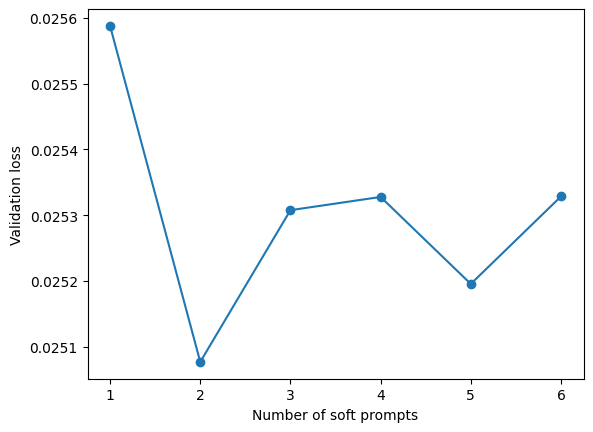

In [ ]:
plt.plot(hp['hyperp'], hp['best_losses'], marker='o', linestyle='-')
plt.xlabel('Number of soft prompts')
plt.ylabel('Validation loss')
plt.show()

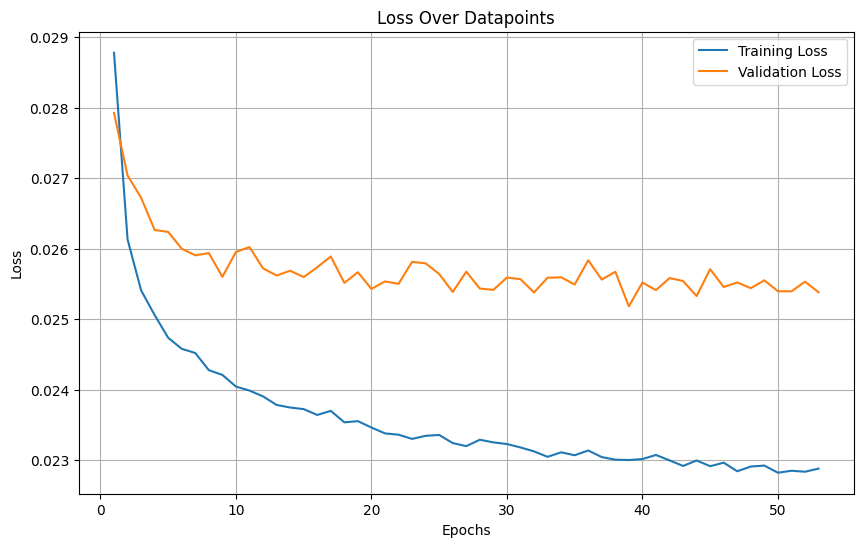

100%|██████████| 4/4 [00:00<00:00, 32.62it/s]


Accuracyasdasdas 67.36842346191406


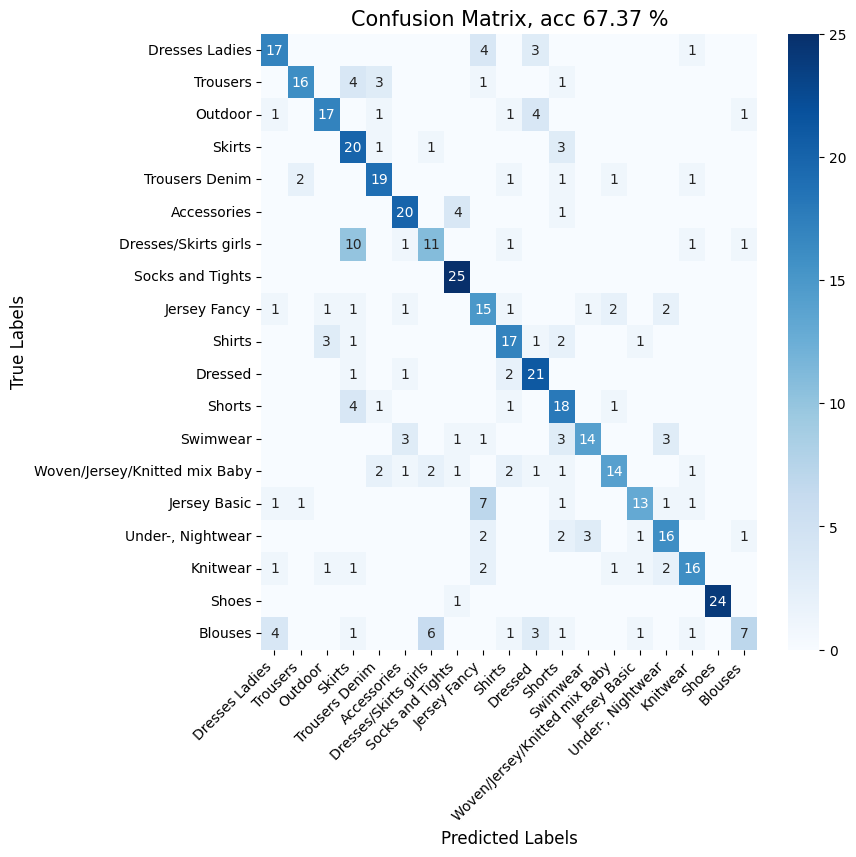

Accuracy of soft prompt is 67.37 %


In [ ]:
ft.plot_loss()
#utils.print_images(dataloader_train, processor,3)
all_predictions, all_labels, acc = ft.eval(False)
utils.confussion_matrix(all_labels, all_predictions, list(dataset_test.class_to_id.keys()),F1=False)
print(f"Accuracy of soft prompt is {acc:.2f} %")

##**LoRA**

In [ ]:
dataloaders = {'train':dataloader_train, 'val':dataloader_val, 'test':dataloader_test}
clip = {'m':model, 'p':processor}

ft = training.FinetuneCLIP(dataloaders, clip)
#ft.initialize({'num_soft':3, 'add':''}) #add rank here

ft.tt['soft'], ft.tt['LoRA'] = 0, 1 #LoRA
#loss, train_p = ft.train() # Fix initialization and forward

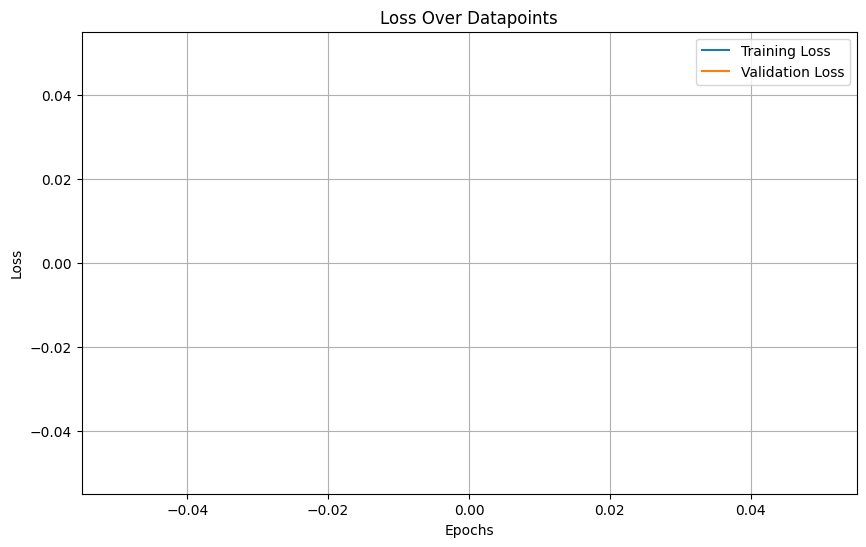

  0%|          | 0/4 [00:00<?, ?it/s]


KeyError: 'add'

In [ ]:
ft.load_p() # get best parameters
ft.plot_loss()
#print_images(dataset_test,2, dataloader_train)
all_predictions, all_labels, acc = ft.eval(True)
utils.confussion_matrix(all_labels, all_predictions, list(dataset_test.class_to_id.keys()),F1=False)


##**Dag anything**

In [ ]:
dataloaders = {'train':dataloader_train, 'val':dataloader_val, 'test':dataloader_test}
clip = {'m':model, 'p':processor}

ft = training.FinetuneCLIP(dataloaders, clip)
